In [9]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix

In [10]:

# 📌 Step 2: Load Dataset
file_path = 'heart_disease.xlsx'  # Update this if necessary
df = pd.read_excel(file_path, sheet_name='Heart_disease')

Missing Values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


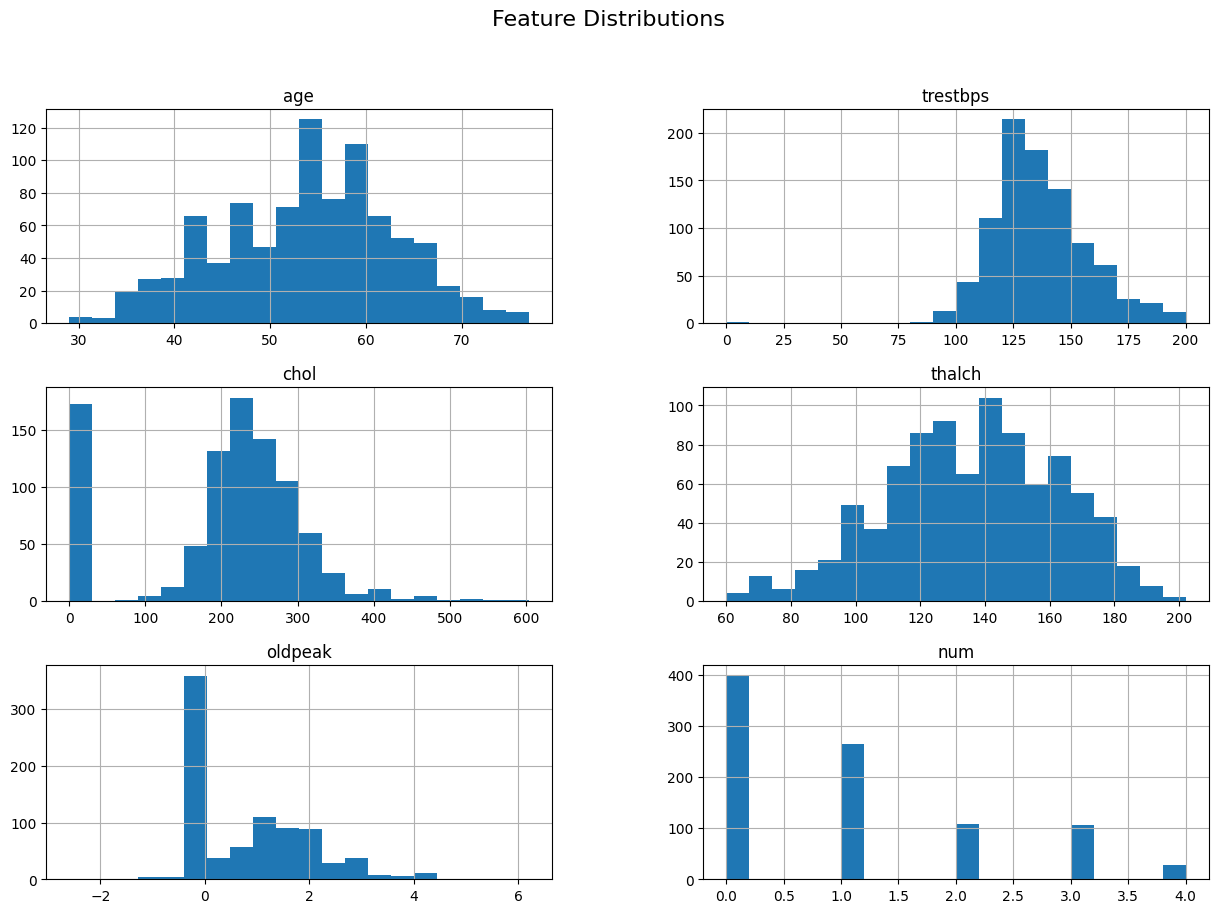

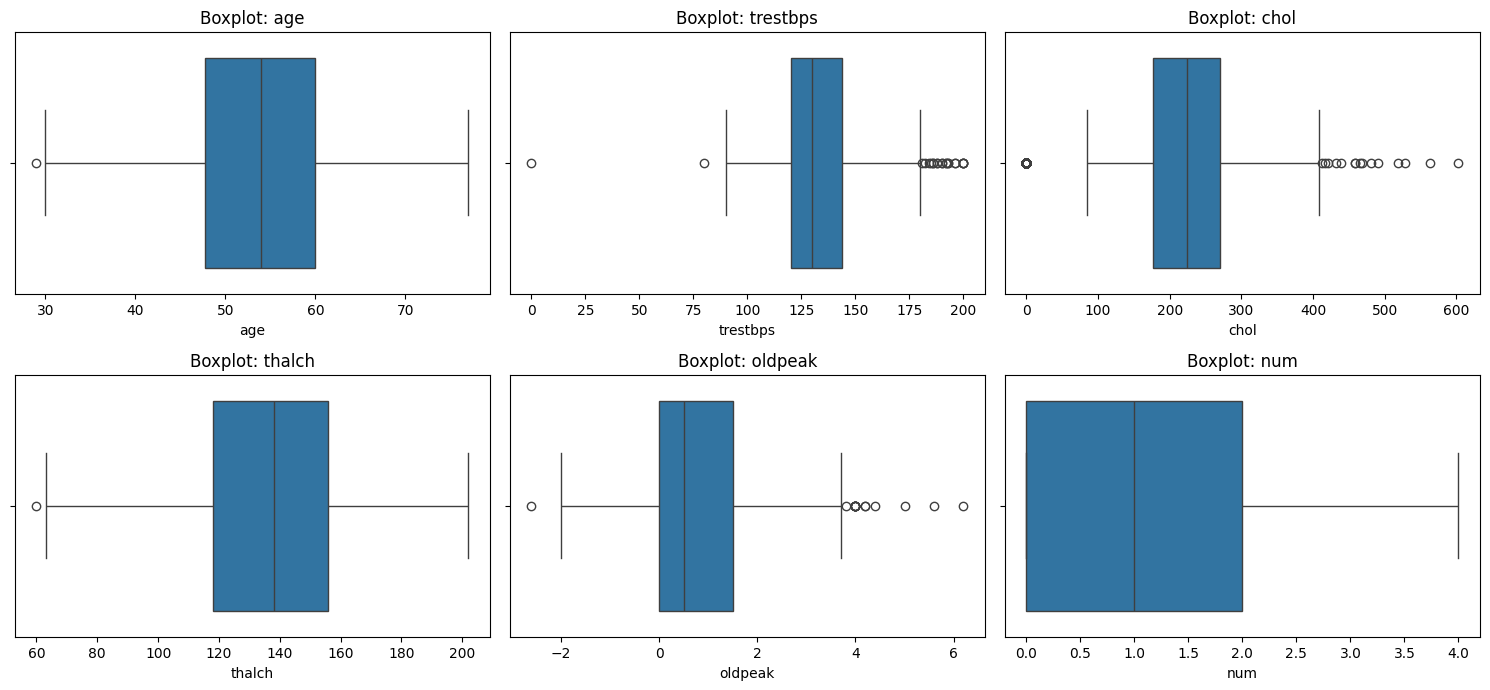

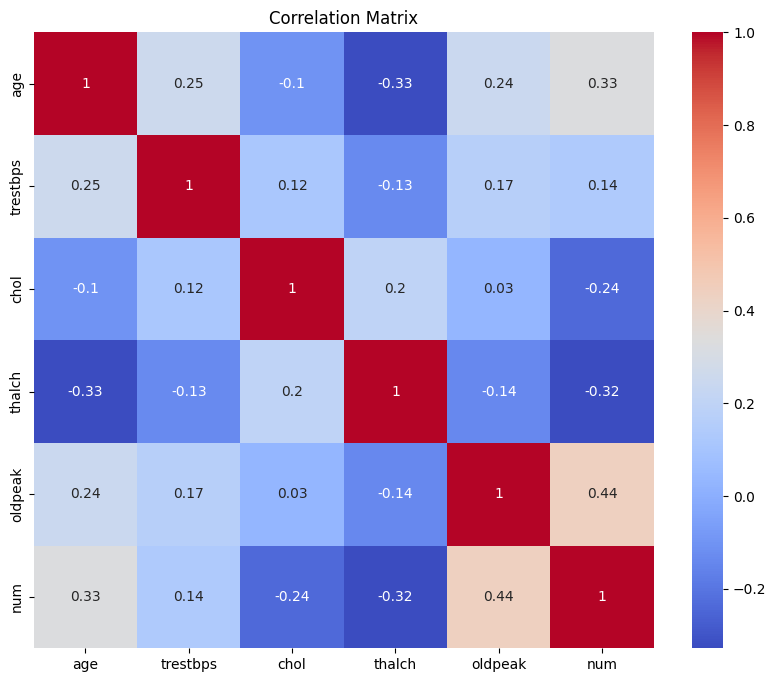

In [11]:



# 📌 Step 3: Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Histograms
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots for outliers
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:


# 📌 Step 4: Feature Engineering

df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [13]:


for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        df[col] = df[col].astype(str)

In [ ]:
#  Step 4: Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [15]:
# 📌 Step 5: Train-Test Split
X = df.drop('num', axis=1)
y = df['num']

# Binary classification: Convert to 0 (no disease) or 1 (disease present)
y = np.where(y > 0, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 📌 Step 6: Decision Tree Classification
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:

# 📌 Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7417582417582418
Precision: 0.7674418604651163
Recall: 0.7096774193548387
F1 Score: 0.7374301675977654

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        89
           1       0.77      0.71      0.74        93

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.74       182

Confusion Matrix:
 [[69 20]
 [27 66]]


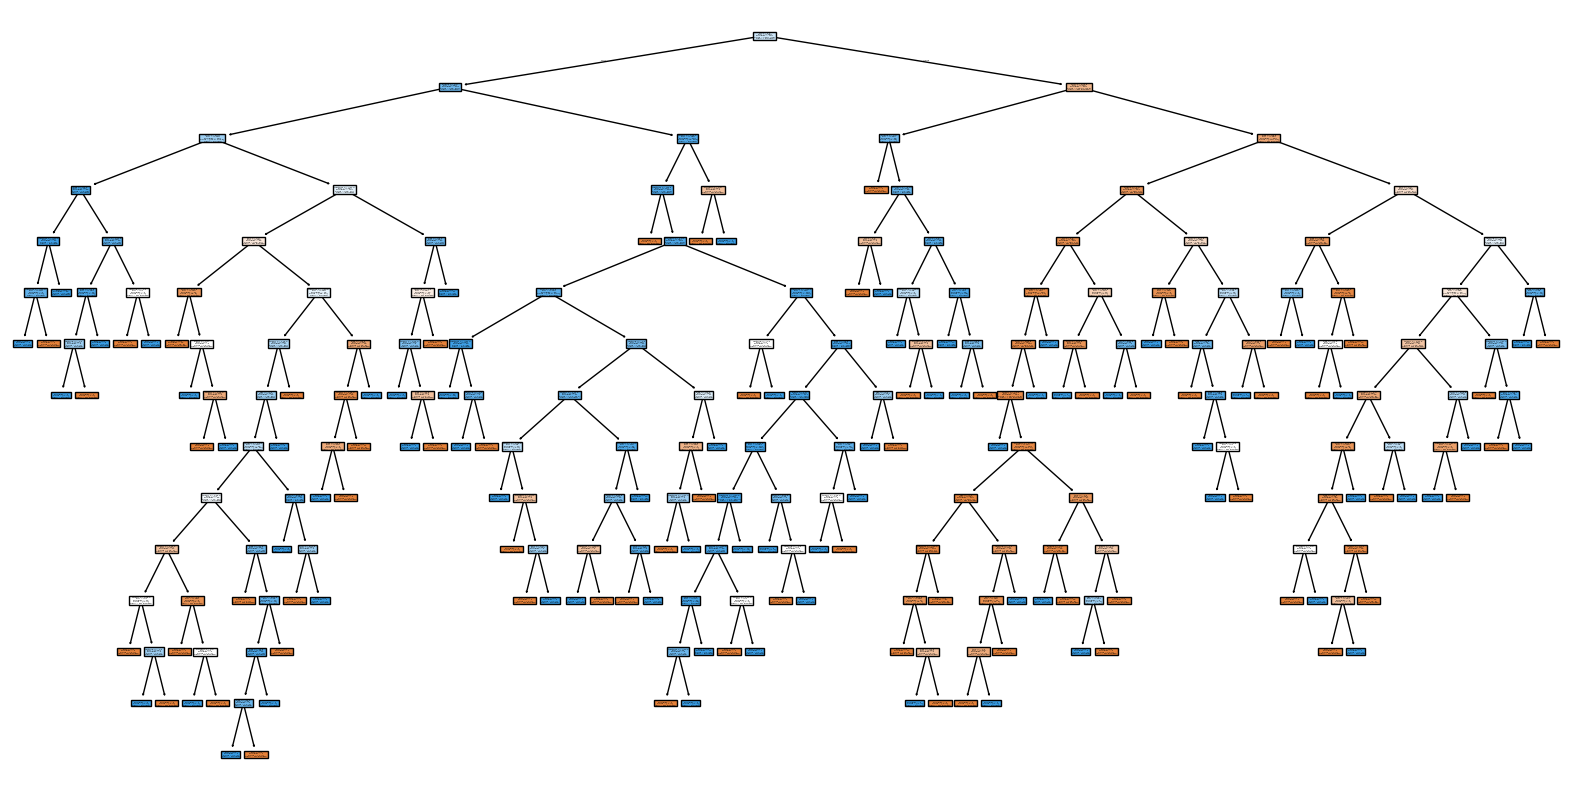

In [18]:
# 📌 Step 8: Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [19]:
# 📌 Step 9: Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [20]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("🔧 Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", f1_score(y_test, y_pred_best))

🔧 Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best F1 Score: 0.7894736842105263


In [21]:
# 📌 Step 10: Final Evaluation
print("Final Accuracy:", accuracy_score(y_test, y_pred_best))
print("Final ROC-AUC:", roc_auc_score(y_test, y_pred_best))

Final Accuracy: 0.7802197802197802
Final ROC-AUC: 0.7796303008336355


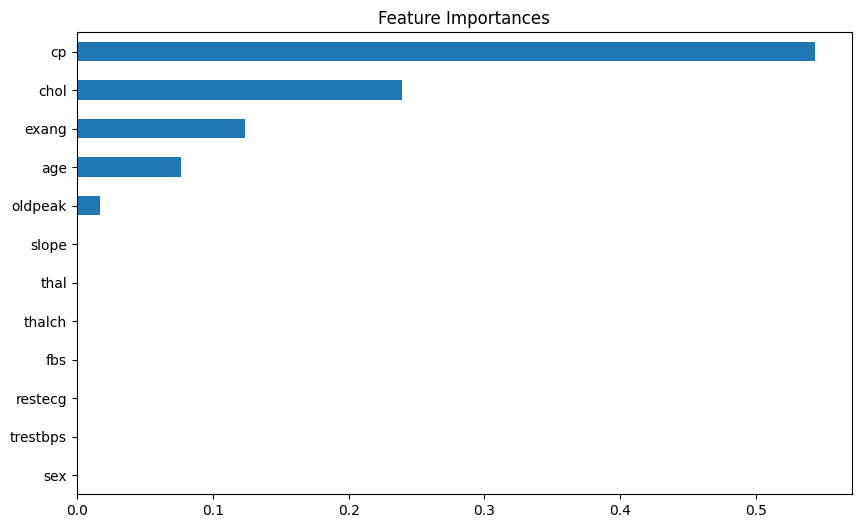

In [22]:
# Feature Importance
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importances")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',  # You can also try 'f1' or 'roc_auc'
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_best = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Improved Accuracy:", accuracy_score(y_test, y_pred_best))
print("Improved F1 Score:", f1_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


🔧 Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Improved Accuracy: 0.7637362637362637
Improved F1 Score: 0.7881773399014779
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.66      0.73        89
           1       0.73      0.86      0.79        93

    accuracy                           0.76       182
   macro avg       0.77      0.76      0.76       182
weighted avg       0.77      0.76      0.76       182

Confusion Matrix:
 [[59 30]
 [13 80]]


###  Final Report Summary: Decision Tree Classification on Heart Disease Dataset

---

####  **Objective**
To build a Decision Tree Classifier that predicts the presence of heart disease and analyze its performance through EDA, preprocessing, model training, and hyperparameter tuning.

---

####  **Data Overview**
- **Rows**: 908  
- **Features**: 13 (Numerical + Categorical)  
- **Target Variable**: `num` (converted to binary: 0 = no disease, 1 = disease)  
- Missing values found in `oldpeak` → handled using **median imputation**

---

####  **Exploratory Data Analysis**
- Histograms and boxplots revealed:
  - Potential outliers in `chol`, `trestbps`, and `oldpeak`
  - Skewed distribution in some features
- Heatmap showed moderate correlations with the target

---

####  **Preprocessing & Feature Engineering**
- Converted all boolean and categorical columns to **string**
- Applied **Label Encoding** to transform categorical features
- Splitting done: **80% Train, 20% Test**

---

####  **Initial Decision Tree Results**
- **Accuracy**: 74.18%  
- **F1 Score**: 73.74%

```
Confusion Matrix:
[[69 20]
 [27 66]]
```

---

####  **Hyperparameter Tuning (GridSearchCV)**
- **Best Parameters**:
```python
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
```
- **Improved Accuracy**: **76.37%**  
- **Improved F1 Score**: **78.82%**

```
Confusion Matrix After Tuning:
[[59 30]
 [13 80]]
```

---

####  **Insights**
- Recall improved significantly for positive cases (from 71% ➜ 86%)
- The model is now better at **detecting true cases of heart disease**, which is **critical in medical diagnosis**
- Some trade-off with false positives (30), but acceptable for recall-focused use case

---

####  **Suggestions**
- Try ensemble models like:
  - `RandomForestClassifier`
  - `GradientBoostingClassifier`
- Use `OneHotEncoding` + `Pipeline` for more robust preprocessing
- Consider feature selection or dimensionality reduction for advanced optimization
